# Smart Meter Octopus Energy Comparison Project
## A Workbook to compare existing electricity smart meter data to the projected costs of different electricity tariffs from Octopus Energy for the next contract period


### How to use this Jupyter Notebook:
1. Download the consumption data from the desired period from the Octopus Energy Website (be aware that if the dataset is not for an entire year, the consumption patterns may not be representative for the entire years costs. Also, be aware that your consumption habits may change after changing tariff e.g. charging an electric car over a certain time of day)
2. Move the CSV file into the same folder that this notebook is in
3. Change the name of the CSV file in the setup section of this notebook so the correct data is being imported
4. Make sure that the tariffs and prices are correct for the available options for the correct postcode on the Octopus energy website (and the time periods have not changed)
5. Run the code and see the comparison

## Setup Section

In [85]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

In [86]:
#Import the data from the CSV file that was downloaded
DF = pd.read_csv('consumption.csv')
DF

,Consumption (kWh),Start,End
0,0.071,2024-01-01T00:00:00+00:00,2024-01-01T00:30:00+00:00
1,0.076,2024-01-01T00:30:00+00:00,2024-01-01T01:00:00+00:00
2,0.067,2024-01-01T01:00:00+00:00,2024-01-01T01:30:00+00:00
3,0.078,2024-01-01T01:30:00+00:00,2024-01-01T02:00:00+00:00
4,0.061,2024-01-01T02:00:00+00:00,2024-01-01T02:30:00+00:00
...,...,...,...
4891,0.041,2024-04-11T22:30:00+01:00,2024-04-11T23:00:00+01:00
4892,0.042,2024-04-11T23:00:00+01:00,2024-04-11T23:30:00+01:00
4893,0.061,2024-04-11T23:30:00+01:00,2024-04-12T00:00:00+01:00
4894,0.041,2024-04-12T00:00:00+01:00,2024-04-12T00:30:00+01:00


In [87]:
# Strip extra spaces from the column names
DF.columns = DF.columns.str.strip()

# Convert 'Start' and 'End' columns to datetime, ignoring timezone information
DF['Start'] = pd.to_datetime(DF['Start'], utc=True)
DF['End'] = pd.to_datetime(DF['End'], utc=True)

# Create a new column for the date extracted from the 'Start' column
DF['Date'] = DF['Start'].dt.date

# Function to calculate the time period number from the 'Start' datetime
def calculate_time_period(start_time):
    return start_time.hour * 2 + (start_time.minute // 30 + 1)

# Create a new column for the time period
DF['Time Period'] = DF['Start'].apply(calculate_time_period)

# Display the first few rows of the DataFrame to verify changes
print(DF.head())

   Consumption (kWh)                     Start                       End  \
0              0.071 2024-01-01 00:00:00+00:00 2024-01-01 00:30:00+00:00   
1              0.076 2024-01-01 00:30:00+00:00 2024-01-01 01:00:00+00:00   
2              0.067 2024-01-01 01:00:00+00:00 2024-01-01 01:30:00+00:00   
3              0.078 2024-01-01 01:30:00+00:00 2024-01-01 02:00:00+00:00   
4              0.061 2024-01-01 02:00:00+00:00 2024-01-01 02:30:00+00:00   

         Date  Time Period  
0  2024-01-01            1  
1  2024-01-01            2  
2  2024-01-01            3  
3  2024-01-01            4  
4  2024-01-01            5  


In [88]:
DF_Final = DF[['Consumption (kWh)', 'Date', 'Time Period']]
DF_Final

,Consumption (kWh),Date,Time Period
0,0.071,2024-01-01,1
1,0.076,2024-01-01,2
2,0.067,2024-01-01,3
3,0.078,2024-01-01,4
4,0.061,2024-01-01,5
...,...,...,...
4891,0.041,2024-04-11,44
4892,0.042,2024-04-11,45
4893,0.061,2024-04-11,46
4894,0.041,2024-04-11,47


In [89]:
DF_Final_Grouped_Consumption = DF_Final.groupby('Time Period')['Consumption (kWh)'].sum().reset_index()
print(DF_Final_Grouped_Consumption.head())

   Time Period  Consumption (kWh)
0            1             12.923
1            2              9.702
2            3             10.195
3            4              8.696
4            5              9.652


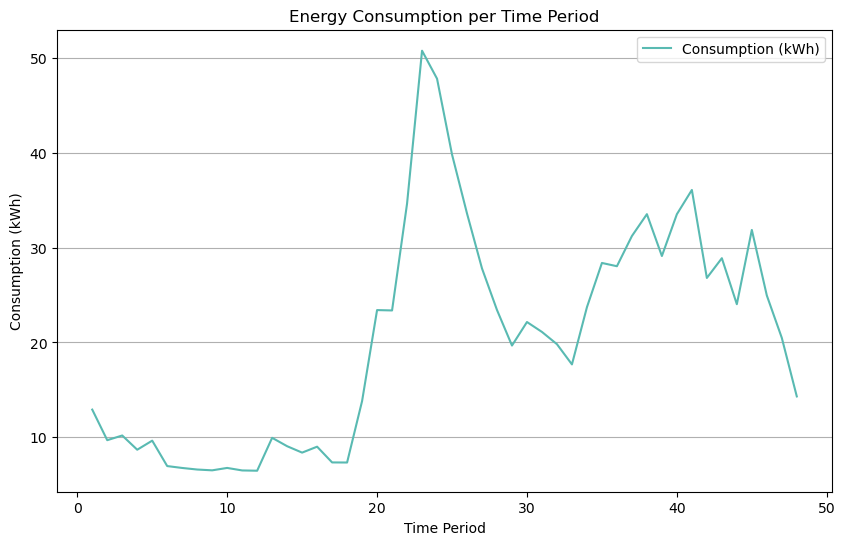

In [120]:
DF_Final_Grouped_Consumption.plot.line(x ='Time Period', y =  'Consumption (kWh)',figsize=(10, 6), color = '#59bab2')
plt.title('Energy Consumption per Time Period')
plt.xlabel('Time Period')
plt.ylabel('Consumption (kWh)')
plt.grid(axis='y')

plt.show()

## Tariff Comparison Section
Standing Charges are the same regardless of the tariff you choose. Therefore, I have left this out of this price comparison

### Agile Octopus
This Tariff has a flat rate for the whole day

In [90]:
Agile_Unit_Rate = 0.2457

In [91]:
Agile_Cost = DF_Final_Grouped_Consumption['Consumption (kWh)'].sum() * Agile_Unit_Rate
print("\033[1mCost:\033[0m", "£", Agile_Cost)

Cost: £ 241.43194530000002


### Cosy Octopus
At the time of writing, times were:
Peak rate (16:00 - 19:00) & 
Cosy rate (04:00 - 07:00 & 13:00 - 16:00)

In [92]:
#Day Rate
Cosy_Unit_Day_Rate = 0.2525
Cosy_Unit_Day_Rate_Periods = [1,2,3,4,5,6,7,14,15,16,17,18,19,20,21,22,23,24,25,26,39,40,41,42,43,44,45,46,47,48]
#Peak Rate
Cosy_Unit_Peak_Rate = 0.3662
Cosy_Unit_Peak_Rate_Periods = [33,34,35,36,37,38]
#Cosy Rate
Cosy_Unit_Cosy_Rate = 0.1237
Cosy_Unit_Cosy_Rate_Periods = [8,9,10,11,12,13,27,28,29,30,31,32]

In [93]:
Cost_Day = DF_Final_Grouped_Consumption[
    DF_Final_Grouped_Consumption['Time Period'].isin(Cosy_Unit_Day_Rate_Periods)
]['Consumption (kWh)'].sum() * Cosy_Unit_Day_Rate

Cost_Peak = DF_Final_Grouped_Consumption[
    DF_Final_Grouped_Consumption['Time Period'].isin(Cosy_Unit_Peak_Rate_Periods)
]['Consumption (kWh)'].sum() * Cosy_Unit_Peak_Rate

Cost_Cosy = DF_Final_Grouped_Consumption[
    DF_Final_Grouped_Consumption['Time Period'].isin(Cosy_Unit_Cosy_Rate_Periods)
]['Consumption (kWh)'].sum() * Cosy_Unit_Cosy_Rate

# Add up the costs for the total
Total_Cosy_Cost = Cost_Day + Cost_Peak + Cost_Cosy

print("\033[1mDay Cost:\033[0m", "£", Cost_Day)
print("\033[1mPeak Cost:\033[0m", "£", Cost_Peak)
print("\033[1mCosy Cost:\033[0m", "£", Cost_Cosy)
print ("")
print("\033[1mTotal Cost:\033[0m", "£", Total_Cosy_Cost)

Day Cost: £ 162.4223925
Peak Cost: £ 59.5247114
Cosy Cost: £ 21.873252500000003

Total Cost: £ 243.8203564


### Intelligent Octopus GO
At the time of writing, night rates were from 23:30 to 05:30 every night

In [94]:
#Day Rate
Intelligent_Go_Day_Rate = 0.2794
Intelligent_Go_Day_Rate_Periods = [12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]
#Night Rate
Intelligent_Go_Night_Rate = 0.075
Intelligent_Go_Night_Rate_Periods = [48,1,2,3,4,5,6,7,8,9,10,11]

In [95]:
Cost_Intelligent_Go_Day = DF_Final_Grouped_Consumption[
    DF_Final_Grouped_Consumption['Time Period'].isin(Intelligent_Go_Day_Rate_Periods)
]['Consumption (kWh)'].sum() * Intelligent_Go_Day_Rate

Cost_Intelligent_Go_Night = DF_Final_Grouped_Consumption[
    DF_Final_Grouped_Consumption['Time Period'].isin(Intelligent_Go_Night_Rate_Periods)
]['Consumption (kWh)'].sum() * Intelligent_Go_Night_Rate

# Add up the costs for the total
Total_Intelligent_Go_Cost = Cost_Intelligent_Go_Day + Cost_Intelligent_Go_Night

print(f"\033[1mIntelligent Go Day Cost:\033[0m", Cost_Intelligent_Go_Day)
print(f"\033[1mIntelligent Go Night Cost:\033[0m", Cost_Intelligent_Go_Night)
print() 
print(f"\033[1mTotal Intelligent Go Cost:\033[0m", Total_Intelligent_Go_Cost)

Intelligent Go Day Cost: 245.02793259999996
Intelligent Go Night Cost: 7.92375

Total Intelligent Go Cost: 252.95168259999997


### Octopus GO
At the time of writing, night rates were from 00:30 to 04:30 every night

In [96]:
#Day Rate
Go_Day_Rate = 0.2794
Go_Day_Rate_Periods = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]
#Night Rate
Go_Night_Rate = 0.9
Go_Night_Rate_Periods = [2,3,4,5,6,7,8,9]

In [97]:
Cost_Go_Day = DF_Final_Grouped_Consumption[
    DF_Final_Grouped_Consumption['Time Period'].isin(Go_Day_Rate_Periods)
]['Consumption (kWh)'].sum() * Go_Day_Rate

Cost_Go_Night = DF_Final_Grouped_Consumption[
    DF_Final_Grouped_Consumption['Time Period'].isin(Go_Night_Rate_Periods)
]['Consumption (kWh)'].sum() * Go_Night_Rate

# Add up the costs for the total
Total_Go_Cost = Cost_Go_Day + Cost_Go_Night

# Output the results with formatting
print(f"\033[1mGo Day Cost:\033[0m {Cost_Go_Day}")
print(f"\033[1mGo Night Cost:\033[0m {Cost_Go_Night}")
print()  # For an empty line
print(f"\033[1mTotal Go Cost:\033[0m {Total_Go_Cost}")

Go Day Cost: 256.35061759999996
Go Night Cost: 58.612500000000004

Total Go Cost: 314.9631176


## Summary

In [98]:
def find_cheapest_rate(**costs):
    # Find the key with the minimum value in the costs dictionary
    cheapest_rate_name = min(costs, key=costs.get)
    cheapest_rate_value = costs[cheapest_rate_name]
    
    # Create the statement
    statement = f"{cheapest_rate_name} cost of £{cheapest_rate_value:.2f} is the cheapest rate available using last year's data."
    return statement

# Find the cheapest rate and create the statement
cheapest_statement = find_cheapest_rate(Agile=Agile_Cost, Cosy=Total_Cosy_Cost, Intelligent_Go=Total_Intelligent_Go_Cost, Go=Total_Go_Cost)

print(cheapest_statement)

Agile cost of £241.43 is the cheapest rate available using last year's data.


In [99]:
print("\033[1mAgile Cost:\033[0m", "£", Agile_Cost)
print("\033[1mCosy Cost:\033[0m", "£", Total_Cosy_Cost)
print(f"\033[1mIntelligent Go Cost:\033[0m", Total_Intelligent_Go_Cost)
print(f"\033[1mGo Cost:\033[0m {Total_Go_Cost}")

Agile Cost: £ 241.43194530000002
Cosy Cost: £ 243.8203564
Intelligent Go Cost: 252.95168259999997
Go Cost: 314.9631176


#### This section is to create a pop up box with the results

In [103]:
import tkinter as tk
from tkinter import messagebox

# Function to show a pop-up message box
def show_popup(title, message):
    # Create a root window
    root = tk.Tk()
    # Hide the root window
    root.withdraw()
    # Call the message box showinfo method
    messagebox.showinfo(title, message)
    # Destroy the root window after the message box is closed
    root.destroy()


popup_title = "Predicted Cost Calculation Results"


popup_message = f"{cheapest_statement}\n" \
                f"   \n" \
                f"Agile Cost: £{Agile_Cost}\n" \
              f"Cosy Cost: £{Total_Cosy_Cost}\n" \
              f"Intelligent Go Cost: £{Total_Intelligent_Go_Cost}\n" \
              f"Go Cost: £{Total_Go_Cost}"

show_popup(popup_title, popup_message)

### Time Period Cheat Sheet
## 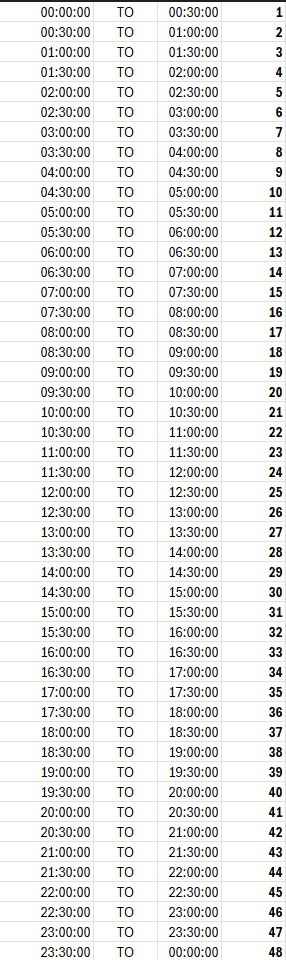